In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/nirupamaprv/Analyze-AB-test-Results/master/ab_edited.csv')

In [3]:
data.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [4]:
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
data['date'] = pd.DatetimeIndex(data['timestamp']).date
print(data.date.unique())

[datetime.date(2017, 1, 21) datetime.date(2017, 1, 12)
 datetime.date(2017, 1, 11) datetime.date(2017, 1, 8)
 datetime.date(2017, 1, 10) datetime.date(2017, 1, 19)
 datetime.date(2017, 1, 17) datetime.date(2017, 1, 4)
 datetime.date(2017, 1, 15) datetime.date(2017, 1, 18)
 datetime.date(2017, 1, 9) datetime.date(2017, 1, 22)
 datetime.date(2017, 1, 24) datetime.date(2017, 1, 23)
 datetime.date(2017, 1, 20) datetime.date(2017, 1, 5)
 datetime.date(2017, 1, 6) datetime.date(2017, 1, 13)
 datetime.date(2017, 1, 7) datetime.date(2017, 1, 3)
 datetime.date(2017, 1, 2) datetime.date(2017, 1, 16)
 datetime.date(2017, 1, 14)]


In [6]:
treatment = data[data["group"] == "treatment"]
control = data[data["group"] == "control"]
treatment

,user_id,timestamp,group,landing_page,converted,date
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,2017-01-19
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,2017-01-04
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,2017-01-15
...,...,...,...,...,...,...
290569,677163,2017-01-03 19:41:51.902148,treatment,new_page,0,2017-01-03
290572,925675,2017-01-07 20:38:26.346410,treatment,new_page,0,2017-01-07
290575,643562,2017-01-02 19:20:05.460595,treatment,new_page,0,2017-01-02
290579,822004,2017-01-04 03:36:46.071379,treatment,new_page,0,2017-01-04


How large is each group?

In [7]:
print(len(treatment))
print(len(control))

145311
145274


What is the signup rate for the test and control groups?

In [10]:
treatment_timestamps= data[data.group == 'treatment']['converted'].mean()
control_timestamps= data[data.group == 'control']['converted'].mean()
treatment_timestamps, control_timestamps

(0.11880724790277405, 0.1203863045004612)

In [12]:
stats.ttest_ind(data[data.group == 'treatment']['converted'],
                data[data.group == 'control']['converted'])

Ttest_indResult(statistic=-1.3116069027036805, pvalue=0.18965383906859376)

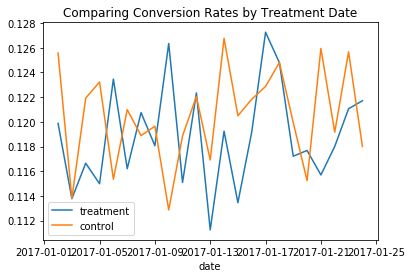

In [13]:
fig = data[data.group == 'treatment'][
    ['date', 'converted']].groupby('date').mean().plot()
data[data.group == 'control'][
    ['date', 'converted']].groupby('date').mean().plot(ax=fig)

plt.legend(['treatment','control'])
plt.title('Comparing Conversion Rates by Treatment Date')
plt.show()